# <center>________________________________________________________________</center>

# <center>REGRESSION MODELS FOR THE AUTOMOBILES DATASET</center>

# <center>________________________________________________________________</center>

# <center>0. INTRODUCTION</center>

In this project, we are going to analyze a dataset of cars with their features and prices. After analyzing this dataset, we will develop regression models to predict a car's price with its properties given. We will also examine the accuracy of these models.</br></br>
Some questions we want to ask in this project:
<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>


Here are the five steps of this projects:</br>
1. **Data Acquisation**
2. **Data Wrangling**
3. **Exploratory Data Analysis**
4. **Model Development**
5. **Further Model Evaluation and Refinement**

### Libraries

In [ ]:
# Install these libraries if necessary

#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy
#!pip install sklearn
#!pip install ipywidgets
#!pip install tqdm

In [1]:
# Import necessary libraries

# Data manupilation
import pandas as pd
import numpy as np


# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic operations
import scipy.stats as sps

# Machine learning and model development
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Others
from ipywidgets import interact, interactive, fixed, interact_manual

from tqdm import tqdm

# <center>________________________________________________________________</center>

# <center>1. DATA ACQUISITION</center>
<p>
The Automobile Dataset is an online source, and it is in a CSV (comma separated value) format.

<ul>
    <li>Original Data source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>Data from personal repository: <a href="https://github.com/efeyemez/Portfolio/blob/main/Datasets/automobile_raw.csv" target="_blank">https://github.com/efeyemez/Portfolio/blob/main/Datasets/automobile_raw.csv</a></li>
</ul>
</p>

## A. Reading Data
<p>
Because the data does not include headers, we can add an argument <code>headers = None</code> inside the <code>read_csv()</code> method so that pandas will not automatically set the first row as a header.<br>
</p>


In [2]:
# Read the online file by the URL provided, and assign it to variable "df"
url = "https://github.com/efeyemez/Portfolio/raw/main/Datasets/automobile_raw.csv"
df = pd.read_csv(url, header=None)
print("The first 3 rows of the dataframe:") 
df.head(3)

The first 3 rows of the dataframe:


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


## B. Adding Headers
<p>
To better describe our data, we will introduce a header. This information is available at:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>.
</p>

In [3]:
# Create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


# <center>________________________________________________________________</center>

# <center>2. DATA WRANGLING</center>
<p>Data wrangling is the process of converting data from the initial format to a format that might be better for analysis.</p>

## A. Handling Missing Values
<p>As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.
We are going to handle these missing value with the steps below:
<ol>
    <li>Identifying missing data</li>
    <li>Dealing with missing data</li>
    <li>Correcting data format</li>
</ol></p>

### i. Identifying Missing Values

<h4>Convert "?" to NaN</h4>

We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience.

In [4]:
# Replace "?" to NaN
df.replace("?", np.NaN, inplace = True)
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h4>Evaluating for Missing Data</h4>

We use the <code>.isnull()</code> method to identify missing values. The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. "True" means the value is a missing value while "False" means the value is not a missing value.

In [5]:
missing_data = df.isnull()
missing_data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h4>Counting missing values in each column</h4>
<p>
By using a <code>for</code> loop in Python, we can quickly figure out the number of missing values in each column.
</p>


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


### ii. Dealing with Missing Data

<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others.

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


In [7]:
# "normalized-losses"
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

# "stroke"
avg_stroke = df['stroke'].astype("float").mean(axis=0)
print('Average of stroke:', avg_stroke)

df['stroke'].replace(np.nan, avg_stroke, inplace = True)

# "bore"
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

df["bore"].replace(np.nan, avg_bore, inplace=True)

# "horsepower"
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

# "peak-rpm"
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average of normalized-losses: 122.0
Average of stroke: 3.255422885572139
Average of bore: 3.3297512437810943
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [8]:
# "num-of-doors"
mode_numofdoors = df['num-of-doors'].value_counts().idxmax()
print("Most frequent number of doors:", mode_numofdoors)

df["num-of-doors"].replace(np.nan, mode_numofdoors, inplace=True)

Most frequent number of doors: four


In [9]:
# "price"
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Now, we have a dataset with no missing values. We can check it again:

In [10]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

### iii. Correcting Data Format

<p>The last step is checking and making sure that all data is in the correct format (int, float, object or other).</p>

We use:

<p><code>.dtypes</code> to check the data type</p>
<p><code>.astype()</code> to change the data type</p>

In [11]:
# List of the data types for each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p>

In [12]:
# Convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int64")
df[["price"]] = df[["price"]].astype("float")
df[["horsepower", "peak-rpm"]] = df[["horsepower", "peak-rpm"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

## B. Data Standardization
<p>
Data is usually collected from different agencies in different formats. Standardization is the process of transforming data into a common format, allowing us to make a meaningful comparison.
</p>

<p>In our dataset, the fuel consumption columns "city-mpg" is represented by mpg (miles per gallon) unit. We will transform mpg to L/100km to use data easily in an area that uses metric system.</p>

<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg

In [13]:
# New column with the name 'city-L/100km'
df['city-L/100km'] = 235/df["city-mpg"]

# Transformed data 
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421


## C. Data Normalization
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<p>We will normalize the columns "length" and "width".</p>

In [14]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df[["length", "width"]].head(3)

,length,width
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722


Here we can see we've normalized "length" and "width" in the range of \[0,1].


## D. Binning
<p> Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis. In our dataset, "horsepower" is a real valued variable ranging from 48 to 262 and it has 59 unique values. We might only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types), so we will rearrange them into three ‘bins' to simplify analysis.
</p>

Let's plot the histogram of horsepower to see what the distribution of horsepower looks like now.

Text(0.5, 1.0, 'Horsepower Bins')

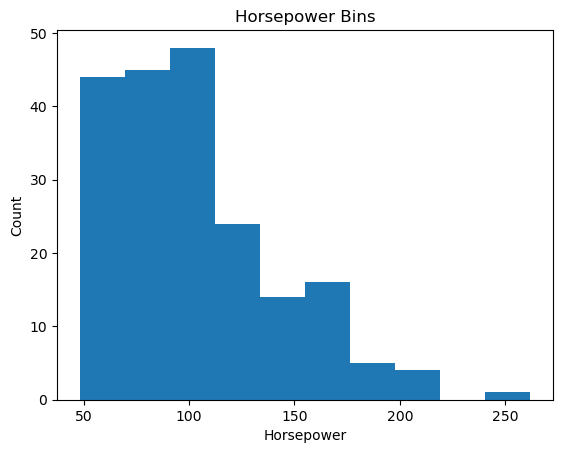

In [15]:
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

<p>We will reduce the number of bins to 3 of equal bandwidth so we use numpy's <code>linspace()</code> function and build a bin array with a minimum value to a maximum value. The values will determine the limits.
</p>

In [16]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 We will use the pandas method <code>.cut()</code> to segment the 'horsepower' column.

In [17]:
group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower-binned']] = df[['horsepower-binned']].astype("object")

df[['horsepower','horsepower-binned']].head(3)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium


Text(0.5, 1.0, 'Horsepower Bins')

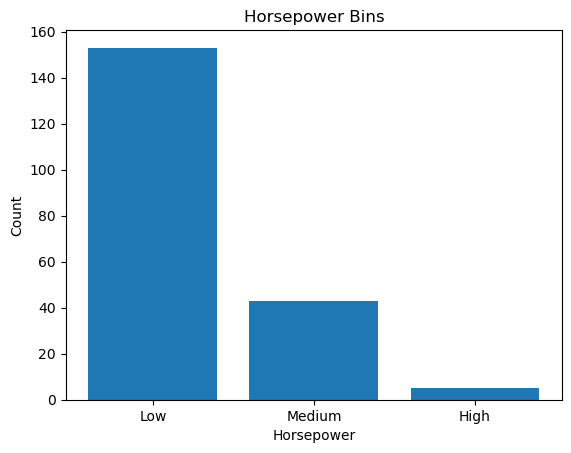

In [18]:
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

We successfully narrowed down the intervals from 59 to 3.

## E. Dummy Variable (One-Hot Encoding)
<p> A dummy variable is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. We use dummy variables so we can use categorical variables for regression analysis.</p>

<p>We see the column "fuel-type" has two unique values: "gas" or "diesel". To use this attribute in regression analysis, we convert "fuel-type" to dummy variables.</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [19]:
# Get the dummy variables and assign it to data frame "dummy_variables"
dummy_variables = pd.get_dummies(df["fuel-type"])

# Merge data frame "df" and "dummy_variables" 
df = pd.concat([df, dummy_variables], axis=1)

# Drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

# Convert data types to proper format
df[["diesel", "gas"]] = df[["diesel", "gas"]].astype("int64")

df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


## F. Data Export
<p> We can export our analysis-ready data:</p>

In [20]:
df.to_csv("automobile_tidy.csv", index=False)

# <center>________________________________________________________________</center>

# <center>3. EXPLORATORY DATA ANALYSIS</center>

## A. Analyzing Individual Feature Patterns Using Visualization

<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


### i. Continuous Numerical Variables

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use <code>.regplot()</code> which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>


<h4>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


(0.0, 53423.60475051008)

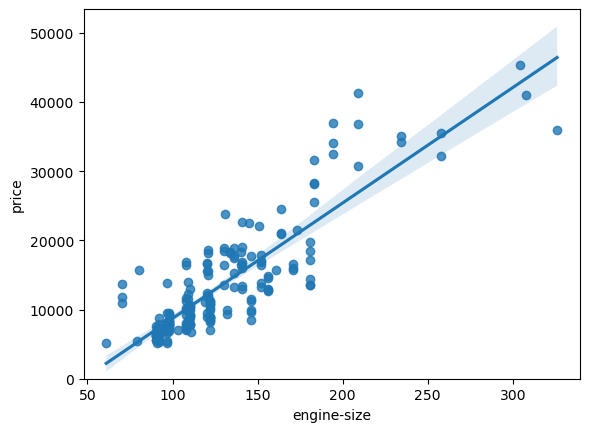

In [21]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [22]:
round(df[["engine-size", "price"]].corr(), 2)

,engine-size,price
engine-size,1.00,0.87
price,0.87,1.00


<h4>Negative Linear Relationship</h4>


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".


<Axes: xlabel='highway-mpg', ylabel='price'>

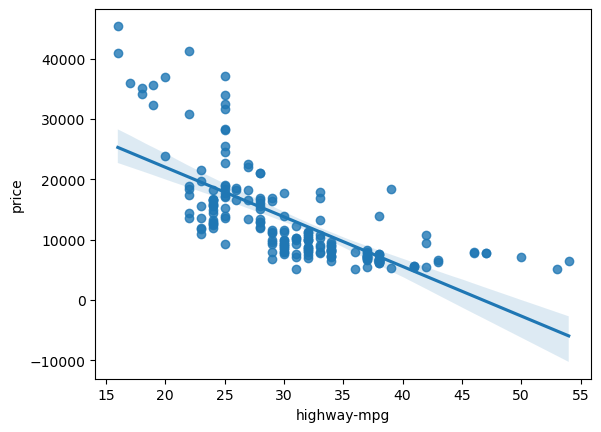

In [23]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.705.


In [24]:
round(df[['highway-mpg', 'price']].corr(), 3)

,highway-mpg,price
highway-mpg,1.000,-0.705
price,-0.705,1.000


<h4>Weak Linear Relationship</h4>


Let's see if "peak-rpm" is a predictor variable of "price".


<Axes: xlabel='peak-rpm', ylabel='price'>

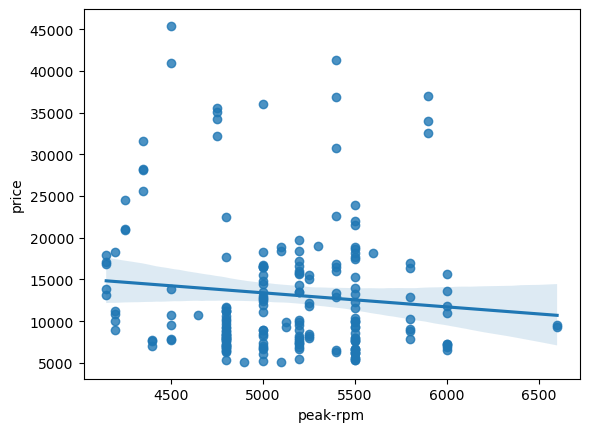

In [25]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.1016.


In [26]:
round(df[['peak-rpm','price']].corr(), 4)

,peak-rpm,price
peak-rpm,1.0000,-0.1016
price,-0.1016,1.0000


### ii. Categorical Variables

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "body-style" and "price".


<Axes: xlabel='body-style', ylabel='price'>

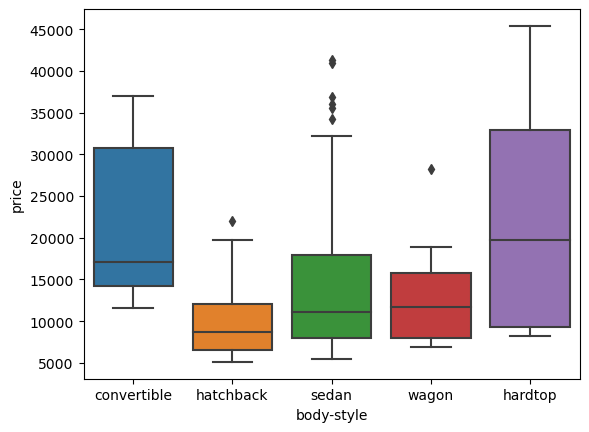

In [27]:
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<Axes: xlabel='engine-location', ylabel='price'>

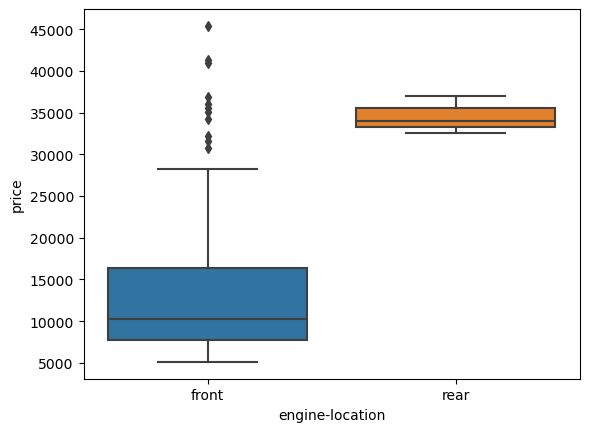

In [28]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


Let's examine "drive-wheels" and "price".


<Axes: xlabel='drive-wheels', ylabel='price'>

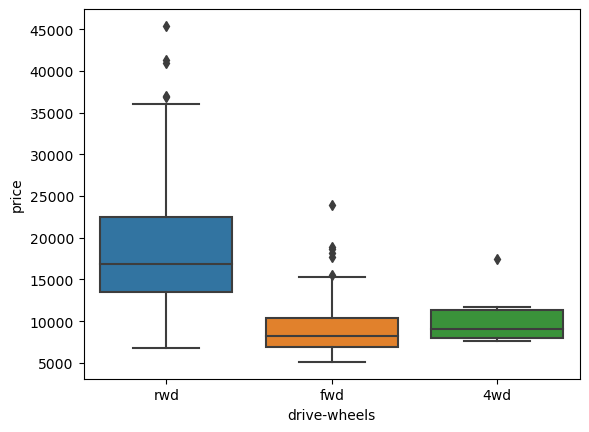

In [29]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


## B. Descriptive Statistical Analysis

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <code>.describe()</code> method automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [30]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [31]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels".</p>


In [32]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a dataframe as follows:


In [33]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.


In [34]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. Because we only have 3 cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


## C. Groupings

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [35]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

In [36]:
# grouping results
df_group_1 = df[['drive-wheels','body-style','price']]
df_group_1 = round(df_group_1.groupby(['drive-wheels'],as_index=False).mean(numeric_only=True), 1)
df_group_1

,drive-wheels,price
0,4wd,10241.0
1,fwd,9244.8
2,rwd,19757.6


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>We can also group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'.</p>


In [37]:
# grouping results
df_group_2 = df[['drive-wheels','body-style','price']]
df_group_2 = round(df_group_2.groupby(['drive-wheels','body-style'],as_index=False).mean(), 1)
df_group_2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.0
1,4wd,sedan,12647.3
2,4wd,wagon,9095.8
3,fwd,convertible,11595.0
4,fwd,hardtop,8249.0
5,fwd,hatchback,8396.4
6,fwd,sedan,9811.8
7,fwd,wagon,9997.3
8,rwd,convertible,23949.6
9,rwd,hardtop,24202.7


<p>This grouped data is much easier to visualize when it is made into a pivot table. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [38]:
grouped_pivot = round(df_group_2.pivot(index='drive-wheels',columns='body-style'), 1)
grouped_pivot

price                                     
body-style   convertible  hardtop hatchback    sedan    wagon
drive-wheels                                                 
4wd                  NaN      NaN    7603.0  12647.3   9095.8
fwd              11595.0   8249.0    8396.4   9811.8   9997.3
rwd              23949.6  24202.7   14337.8  21711.8  16994.2

<p>We can fill the missing cells with the value 0, but any other value could potentially be used as well.</p>

In [39]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                     
body-style   convertible  hardtop hatchback    sedan    wagon
drive-wheels                                                 
4wd                  0.0      0.0    7603.0  12647.3   9095.8
fwd              11595.0   8249.0    8396.4   9811.8   9997.3
rwd              23949.6  24202.7   14337.8  21711.8  16994.2

We can use a heat map to visualize the relationship between Body Style vs Price.


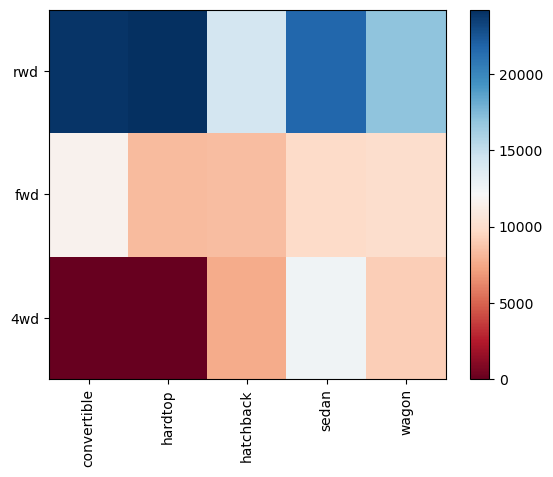

In [40]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>To get a better measure of the important characteristics, we will look at the correlation of the variables with the car price. In other words: how is the car price dependent on the variables?</p>


## D. Correlation

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables x and y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


We can calculate the correlation between variables  of type "int64" or "float64" using the method <code>.corr()</code>:


In [41]:
corr_table = df.corr(numeric_only=True)
corr_table

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.241064,-0.241064


We isolate the correlation values of the "price" variable.

In [42]:
# We drop the price vs. price cell
price_corr = corr_table.loc[["price"]].drop(["price"], axis=1)
price_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
price,-0.082391,0.133999,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.543155,0.082269,0.071107,0.809575,-0.101616,-0.686571,-0.704692,0.789898,0.110326,-0.110326


We can also use a heatmap again to visualize the correlation values.

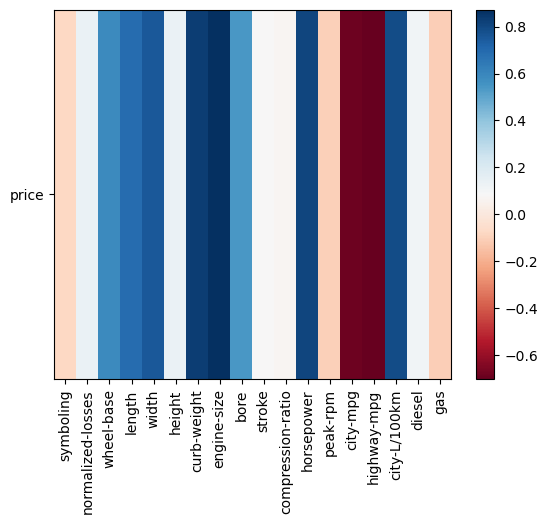

In [43]:
fig, ax = plt.subplots()
im = ax.pcolor(price_corr, cmap='RdBu')

#label names
row_labels = price_corr.columns
col_labels = price_corr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(price_corr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(price_corr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

We can filter the highly correlated variables with an arbitrary threshold, such as 0.5

In [44]:
high_corr = price_corr[abs(price_corr) > 0.5].dropna(axis=1)
high_corr

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,city-L/100km
price,0.584642,0.690628,0.751265,0.834415,0.872335,0.543155,0.809575,-0.686571,-0.704692,0.789898


<p>We can ignore one of the variables "city-L/100km" or "city-mpg" since they have derived from each other. We will continue with "city-mpg".</p>
<p>Now we know the variables that highly correlated with our target variable, "price", but we also need to examine the significance of these correlations.</p>

<b>P-value</b>

<p>The P-value is the probability value that the correlation between the two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.

<h3>Wheel-Base vs. Price</h3>


In [45]:
pearson_coef, p_value = sps.pearsonr(df['wheel-base'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is 0.585  with a p-value of  8.076488270732552e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Length vs. Price</h3>

In [46]:
pearson_coef, p_value = sps.pearsonr(df['length'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is 0.691  with a p-value of  8.016477466158383e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


In [47]:
pearson_coef, p_value = sps.pearsonr(df['width'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is 0.751  with a p-value of  9.20033551048144e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).


### Curb-Weight vs. Price


In [48]:
pearson_coef, p_value = sps.pearsonr(df['curb-weight'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is 0.834  with a p-value of  2.189577238893391e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

In [49]:
pearson_coef, p_value = sps.pearsonr(df['engine-size'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is 0.872  with a p-value of  9.265491622198793e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


In [50]:
pearson_coef, p_value = sps.pearsonr(df['bore'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is 0.543  with a p-value of  8.049189483935034e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.543).</p>


<h3>Horsepower vs. Price</h3>


In [51]:
pearson_coef, p_value = sps.pearsonr(df['horsepower'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is 0.81  with a p-value of  6.369057428260919e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.81, close to 1).</p>


<h3>City-mpg vs. Price</h3>


In [52]:
pearson_coef, p_value = sps.pearsonr(df['city-mpg'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is -0.687  with a p-value of  2.3211320655673725e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [53]:
pearson_coef, p_value = sps.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson correlation coefficient r is", round(pearson_coef, 3), " with a p-value of ", p_value)

The Pearson correlation coefficient r is -0.705  with a p-value of  1.7495471144474792e-31


#### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


## E. ANOVA


<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h4>Drive Wheels</h4>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [54]:
grouped_test_anova = df[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test_anova.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


We can obtain the values of the group using the method "get_group" and can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.

In [55]:
# ANOVA
f_val, p_val = sps.f_oneway(grouped_test_anova.get_group('fwd')['price'], grouped_test_anova.get_group('rwd')['price'], grouped_test_anova.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### fwd and rwd


In [56]:
f_val, p_val = sps.f_oneway(grouped_test_anova.get_group('fwd')['price'], grouped_test_anova.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd


In [57]:
f_val, p_val = sps.f_oneway(grouped_test_anova.get_group('4wd')['price'], grouped_test_anova.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [58]:
f_val, p_val = sps.f_oneway(grouped_test_anova.get_group('4wd')['price'], grouped_test_anova.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


We notice that ANOVA for the categories `4wd` and `fwd` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.


## F. Conclusion: Important Variables

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


# <center>________________________________________________________________</center>

# <center>4. MODEL DEVELOPMENT</center>

<p>Now we will develop several regression models that will predict the price of the car using the variables. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


## A. Linear Regression and Multiple Linear Regression


### i. Linear Regression


Create the linear regression object:


In [59]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>

We want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the target variable.

In [60]:
X = df[['highway-mpg']]
Y = df[['price']]

lm.fit(X,Y)

# We can also generate the predicted results

Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

Value of the intercept and slope:


In [61]:
print(lm.intercept_)
print(lm.coef_)

[38423.30585816]
[[-821.73337832]]


The final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


### ii. Multiple Linear Regression


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
We will develop a model using these variables as the predictor variables.


In [62]:
# lm = LinearRegression()

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, Y)

print(lm.intercept_)
print(lm.coef_)

[-15806.62462633]
[[53.49574423  4.70770099 81.53026382 36.05748882]]


The final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

<b>Price</b> = -15806.624626329205 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


## B. Polynomial Regression and Pipelines

### i. Single Variable

We will fit a 3rd degree polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [63]:
# Functions require the data as series instead of dataframe
X = df['highway-mpg']
Y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


### ii. Multiple Variables

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transformation on multiple features by creating a <b>PolynomialFeatures</b> object of degree 2:

In [64]:
pf = PolynomialFeatures(degree=2)
Z_transform = pf.fit_transform(Z)
print(Z.shape)
print(Z_transform.shape)

(201, 4)
(201, 15)


In the original data, there are 201 samples and 4 features. After the transformation, there are 201 samples and 15 features.

Now we train the model with transformed data:

In [65]:
#lm = LinearRegression()

lm.fit(Z_transform, Y)

print(lm.intercept_)
print(lm.coef_)

-21262.848278693527
[ 0.00000000e+00  3.79990747e+02  9.53081616e+00 -1.06265103e+02
  1.82168928e+02  1.69423474e+00 -1.86864385e-01 -1.29043091e+00
 -2.14860064e+00  7.57100954e-04  1.11910005e-01 -1.92007463e-01
  8.95252693e-02  4.23869258e-02  4.66019878e+00]


Now we can calculate the prediction of the model:

In [66]:
Yhat_multipoly = lm.predict(Z_transform)
Yhat_multipoly[0:4]

array([13102.74784197, 13102.74784197, 18225.54572197, 10390.29636543])

### iii. Using a Pipeline

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [67]:
# We create the pipeline by creating a list of tuples including the name of the object and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)

# We convert the data type Z to type float to avoid conversion warnings.
Z = Z.astype(float)

Now, we can normalize the data,  perform a transform and fit the model simultaneously.

In [68]:
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [69]:
Yhat_pipe = pipe.predict(Z)

We can see below that by using pipeline we came to the same conclusion, but much faster.

In [70]:
print(Yhat_pipe[0:4])
print(Yhat_multipoly[0:4])

[13102.74784201 13102.74784201 18225.54572197 10390.29636555]
[13102.74784197 13102.74784197 18225.54572197 10390.29636543]


## C. Model Evaluation Using Visualization


Now that we've developed some models, one way to evaluate the models is by using a visualization.


### i. Regression Plot for Simple Linear Regression


<p>When it comes to simple linear regression, a good way to visualize the fit of the model is by using <b>regression plots</b>, which shows a combination of a <b>scatterplot</b>, as well as the fitted <b>linear regression</b> line going through the data.</p>


We will visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48164.73598329164)

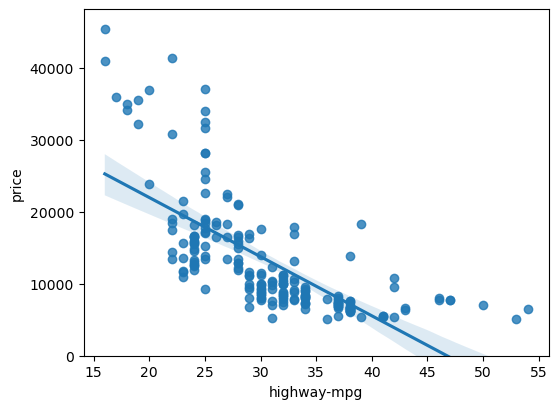

In [71]:
plt.figure(figsize=(6, 4.5))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

How scattered the data points are around the regression line gives a good indication of the variance of the data. If the data is too far off from the line, this linear model might not be the best.</p>


### ii. Residual Plot for Simple Linear Regression

<p>When we look at a regression plot, the residual is the distance from the data point to the fitted regression line. A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis. If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then the <b>linear model is appropriate</b> for the data. That means that the variance is constant, and thus the linear model is a good fit for this data.</p>

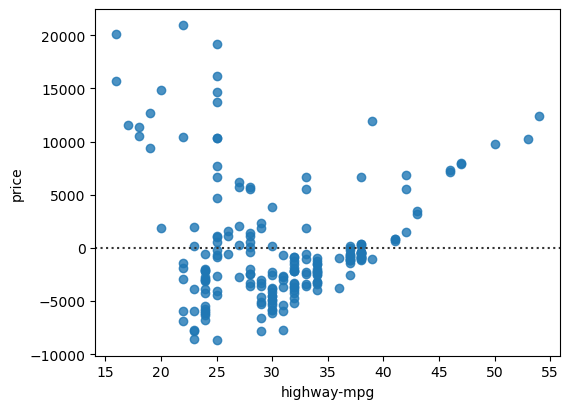

In [72]:
plt.figure(figsize=(6, 4.5))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


### iii. Distribution Plot for Multiple Linear Regression

<p>We can't visualize a model for Multiple Linear Regression with regression or residual plot. One way to look at the fit of the model is by looking at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [73]:
lm.fit(Z,Y)
Yhat = lm.predict(Z)

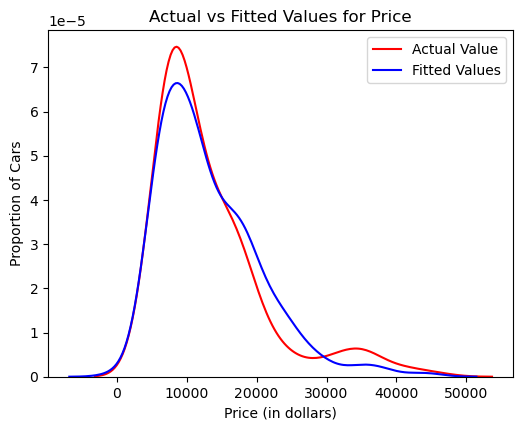

In [74]:
plt.figure(figsize=(6, 4.5))


ax1 = sns.kdeplot(Y.squeeze(), color="red", label="Actual Value")
sns.kdeplot(Yhat.squeeze(), color="blue", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


### iv. Polynomial Regression

<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable (residuals were not randomly spread).</p>
<p>We will look at the polynomial model instead.</p>

<p>We will use the following function to plot the data:</p>


In [75]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.950, 0.950, 0.950))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

We can plot the polynomial model and compare it with the previous linear model

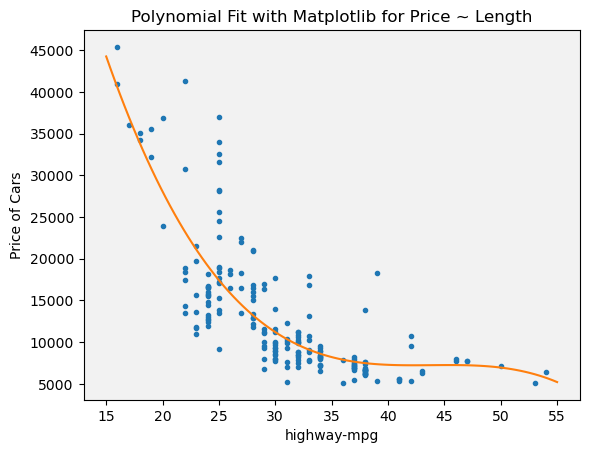

In [76]:
PlotPolly(p, X, Y, 'highway-mpg')

(0.0, 48184.02525859446)

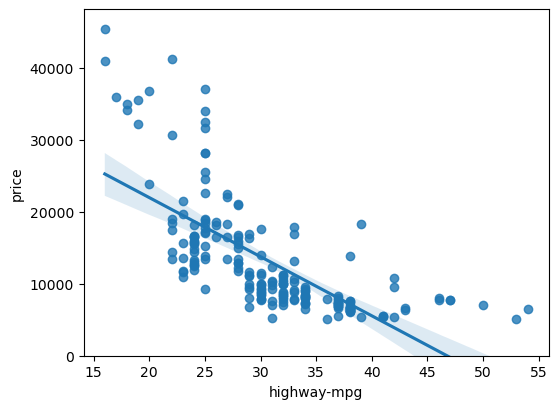

In [77]:
plt.figure(figsize=(6, 4.5))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.</p>


## D. Measures for In-Sample Evaluation

<p>When evaluating the models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


### Model 1: Simple Linear Regression


<h4>Calculation of the R^2:</h4>

In [78]:
X = df[['highway-mpg']]
Y = df[['price']]

#highway_mpg_fit
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that \~49.659% of the variation of the price is explained by this simple linear model.


<h4>Calculation of the MSE:</h4>

In [79]:
Yhat=lm.predict(X)
mse = mean_squared_error(Y, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression


<h4>Calculation of the R^2:</h4>

In [80]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# fit the model 
lm.fit(Z, Y)

# Find the R^2
print('The R-square is: ', lm.score(Z, Y))

The R-square is:  0.8093562806577458


We can say that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


<h4>Calculation of the MSE:</h4>

In [81]:
Yhat_multi = lm.predict(Z)
mse = mean_squared_error(Y, Yhat_multi)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11980366.870726489


### Model 3: Polynomial Regression

<h4>Calculation of the R^2:</h4>

We will use the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.

In [82]:
r_squared = r2_score(Y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906516


We can say that \~67.419 % of the variation of price is explained by this polynomial fit.


<h4>Calculation of the MSE:</h4>

In [83]:
mse = mean_squared_error(Y, p(X))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  20474146.42636123


## E. Decision Making

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, we can determine a good model fit.
</p>
<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
</p>
<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Values for the different models:</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


### i. Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

<p>Usually, the more variables we have, the better the model is at predicting, but this is not always true. Sometimes we may not have enough data, we may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


### ii. Simple Linear Model (SLR) vs. Polynomial Fit

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


### iii. Multiple Linear Regression (MLR) vs. Polynomial Fit

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


## F. Conclusion

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>


# <center>________________________________________________________________</center>

# <center>5. FURTHER MODEL EVALUATION AND REFINEMENT</center>

For further examination, we will only use the numeric data:

In [84]:
df=df._get_numeric_data()
df.head(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1


### Functions for Plotting


In [85]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(6, 4.5))

    ax1 = sns.kdeplot(RedFunction.squeeze(), color="red", label=RedName)
    ax2 = sns.kdeplot(BlueFunction.squeeze(), color="blue", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.legend()
    
    plt.show()
    plt.close()

In [86]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    plt.figure(figsize=(6, 4.5))    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## A. Training and Testing

<p>An important step in testing our model is to split our data into training and testing data. First, we will place the target data <b>price</b> in a separate dataframe <b>y_data</b> and drop it in dataframe <b>x_data</b>:
</p>

In [87]:
y_data = df['price']
x_data = df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 21
Number of training samples: 180


### Context: Model 1: Simple Linear Regression

We calculate the R^2 on the test and training data for the predictor "highway-mpg" for target "price":

In [89]:
# lm = LinearRegression()

lm.fit(x_train[['highway-mpg']], y_train)

print("R^2 of training data: ", lm.score(x_train[['highway-mpg']], y_train))
print("R^2 of test data: ", lm.score(x_test[['highway-mpg']], y_test))

R^2 of training data:  0.5083627320666815
R^2 of test data:  -0.02688896960469922


We see the R^2 for the training data is 0.5083 while the R^2 on the test data was -0.0268. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


### Cross-Validation Scores


Sometimes we do not have sufficient testing data; as a result, we may want to perform cross-validation. We input the object (the model), the feature ("highway-mpg"), and the target data ("price") into <code>cross_val_score()</code> function and create an object that we can use for cross-validation.


<h4>Calculation of the R^2:</h4>

The parameter 'cv' determines the number of folds. In our case, it is 4. The default scoring in the funciton is R^2. Each element in the returned array has the R^2 value of the fold:

In [90]:
Rcross = cross_val_score(lm, x_data[['highway-mpg']], y_data, cv=4)
Rcross

array([0.56273923, 0.50617506, 0.36024954, 0.123501  ])

In [91]:
print("The mean of the folds are", Rcross.mean())

The mean of the folds are 0.3881662072564622


Previously in our model evaluation, our Simple Linear Regression model has yielded R^2 score ~0.4965. The cross-validated model yields ~0.3881 on average.

<h4>Calculation of the MSE:</h4>

We can use negative squared error to calculate mean squared error values, by setting the parameter  'scoring' to 'neg_mean_squared_error'.

In [92]:
MSEcross = -1 * cross_val_score(lm,x_data[['highway-mpg']], y_data,cv=4,scoring='neg_mean_squared_error')
MSEcross

array([39295713.70380161, 44741370.23768637, 31815771.02184274,
       16175859.8343302 ])

In [93]:
print("The mean of the folds are", MSEcross.mean())

The mean of the folds are 33007178.69941523


Previously in our model evaluation, our Simple Linear Regression model has yielded MSE of 3.16 x10^7. The cross-validated model yields 3.3x10^7 on average.

## B. Overfitting and Underfitting


<p>The test data, sometimes referred to as the "out of sample data", is a much better measure of how well our model performs in the real world.  One reason for this is overfitting. These differences are more apparent in Multiple Linear Regression and Polynomial Regression</p>

<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing our model using the test set, our model does not perform as well since it is modelling noise, not the underlying process that generated the relationship.</p>


### Context: Model 2: Multiple Linear Regression

We train the model using training data with the features of our previous MLR and create predictions from both test and training data:

In [94]:
# lm = LinearRegression()
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

Yhat_train = lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Yhat_test = lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Now we will perform some model evaluation by looking at the distribution of our training and testing data separately.

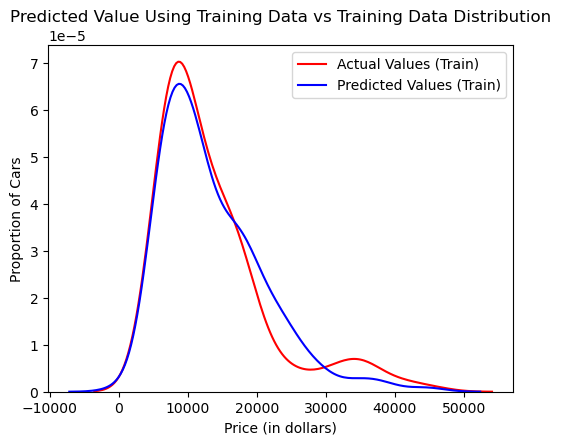

In [95]:
Title = 'Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, Yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

The model seems to be doing well in learning from the training dataset. But when the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

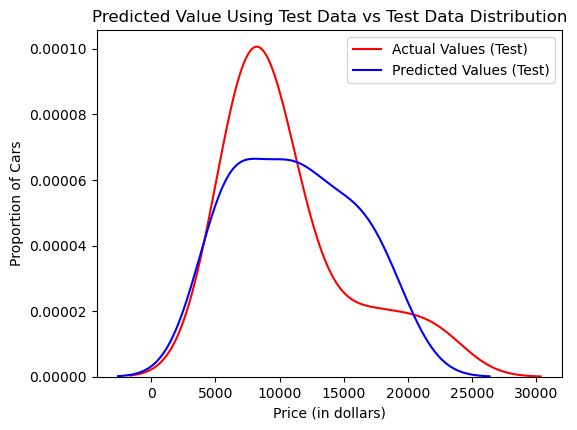

In [96]:
Title='Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test,Yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<p>Comparing the two figures, it is evident that the distribution of the training data is much better at fitting the data. This difference in second figure is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different.</p>


### Context: Model 3: Polynomial Regression

We will use 55 percent of the data for training and the rest for testing:

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform different degrees of transformation on the feature <b>'highway-mpg'</b>, train a Linear Regression for each model, and plot the R^2 values to find the optimum degree for our previous polynomial regression model.

Text(0.5, 1.0, 'R^2 Using Test Data')

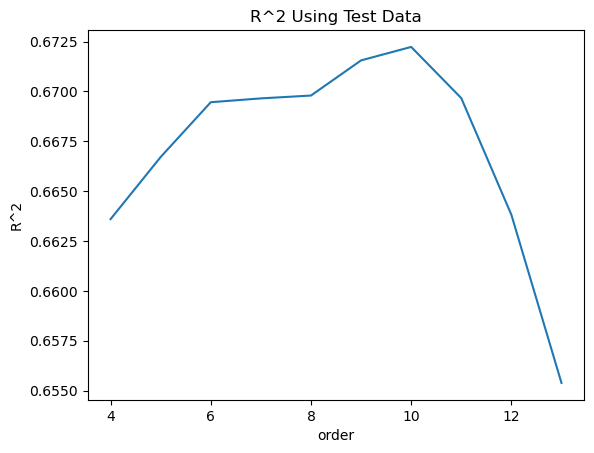

In [98]:
Rsqu_test = []

order = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
    
    x_test_pr = pr.fit_transform(x_test[['highway-mpg']])    
    
    # lm = LinearRegression()
    lm.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lm.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

We see the R^2 gradually increases until an order 10 polynomial is used. Then, the R^2 dramatically decreases.


We will perform a degree 10 polynomial transformation on the feature <b>'highway-mpg'</b>, train the Linear Regression model, and assign the output of our model "Yhat".

In [99]:
pr = PolynomialFeatures(degree=10)
x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['highway-mpg']])

# lm = LinearRegression()
lm.fit(x_train_pr, y_train)

Yhat = lm.predict(x_test_pr)

print("R^2 of the training data:", lm.score(x_train_pr, y_train))
print("R^2 of the test data:", lm.score(x_test_pr, y_test))

R^2 of the training data: 0.6826883178074996
R^2 of the test data: 0.6722332645064705


We will use the function "PollyPlot" that we defined to display the training data, testing data, and the predicted function.

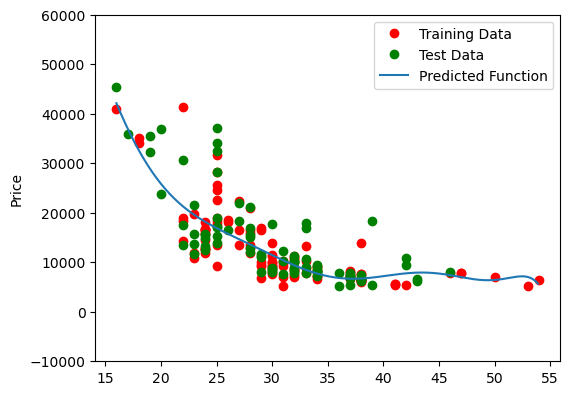

In [100]:
PollyPlot(x_train[['highway-mpg']], x_test[['highway-mpg']], y_train, y_test, lm,pr)

We see that model fits the data quite well and there is no sign of over/underfitting.

### Observation of Overfitting

Interactive plotting function:

In [101]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
    x_test_pr = pr.fit_transform(x_test[['highway-mpg']])
    lm = LinearRegression()
    lm.fit(x_train_pr,y_train)
    PollyPlot(x_train[['highway-mpg']], x_test[['highway-mpg']], y_train,y_test, lm, pr)

The following interface allows us to experiment with different polynomial orders and different amounts of test data.

In [102]:
interact(f, order=(0, 25, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=12, description='order', max=25), FloatSlider(value=0.45, description='t…

<function __main__.f(order, test_data)>

We can see that at a reasonable test size, as we increase the degree from 10, the model starts to overfit and catch the noise. Inversely, as we decrease the degree from 10, the model starts to underfit.

## C. Ridge Regression

In this section, we will examine Ridge Regression and see how the parameter alpha changes the multivariate models. Here our test data will be used as validation data.

### Context: Model 3: Multiple Linear Regression

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

Now we will create a Ridge regression object, setting the regularization parameter (alpha) to 1, fit the model using the method <b>fit</b>, and obtain a prediction:

In [104]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
Yhat = RigeModel.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

We select the value of alpha that minimizes the test error. To do so, we can use a for loop. There is also a progress bar to see how many iterations we have completed so far.

In [105]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
    test_score, train_score = RigeModel.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test), RigeModel.score(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:12<00:00, 80.87it/s, Test Score=0.623, Train Score=0.814]


We can plot out the value of R^2 for different alphas:


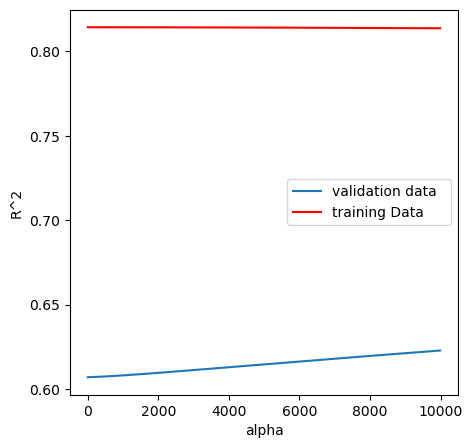

In [106]:
width = 5
height = 5
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The x-axis represents the different values of Alpha.

The red line in the figure represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


### Context: Model 4: Multiple Polynomial Regression

We will perform a degree 2 polynomial transformation on our data and repeat the previous process.

In [107]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [108]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
Yhat = RigeModel.predict(x_test_pr)

In [109]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 206.27it/s, Test Score=0.719, Train Score=0.847]


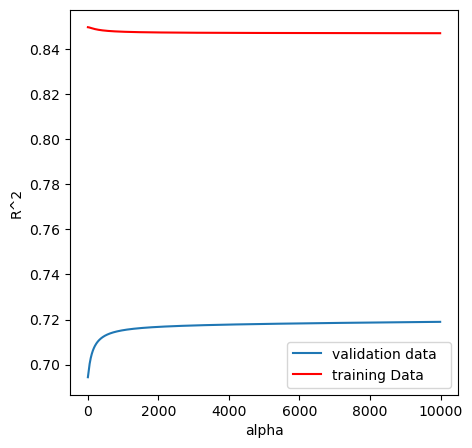

In [110]:
width = 5
height = 5
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The x-axis represents the different values of Alpha.

The red line in the figure represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


## D. Grid Search

The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


We will create a dictionary of parameter values, a ridge regression object, and a ridge grid search object. Then we will fit the model:

In [111]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [112]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Now we can test our model on the test data and obtain the R^2 as follows:

In [113]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.6373308904159392

# <center>________________________________________________________________</center>